# Linear Regression and PCA - Boston Housing

# About the Data

Dataset: http://lib.stat.cmu.edu/datasets/boston

-Variables
There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.


CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - per lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

# Data Loading

In [1]:
# Import Libraries needed to load the data
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
# Load the data from sklearn module
df = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
df['MEDV'] = pd.DataFrame(load_boston().target)
print('Shape of Data is : {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Shape of Data is : 506 rows and 14 columns


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Lets look at the null values of the data
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<p>Good! no null values in the  data.</p>

In [5]:
# Lets look at the datatype of the features
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All numeric, great!!!

# Exploratory Data Analysis

In [6]:
# import libraries needed to do EDA
import matplotlib.pyplot as plt
import seaborn as sns

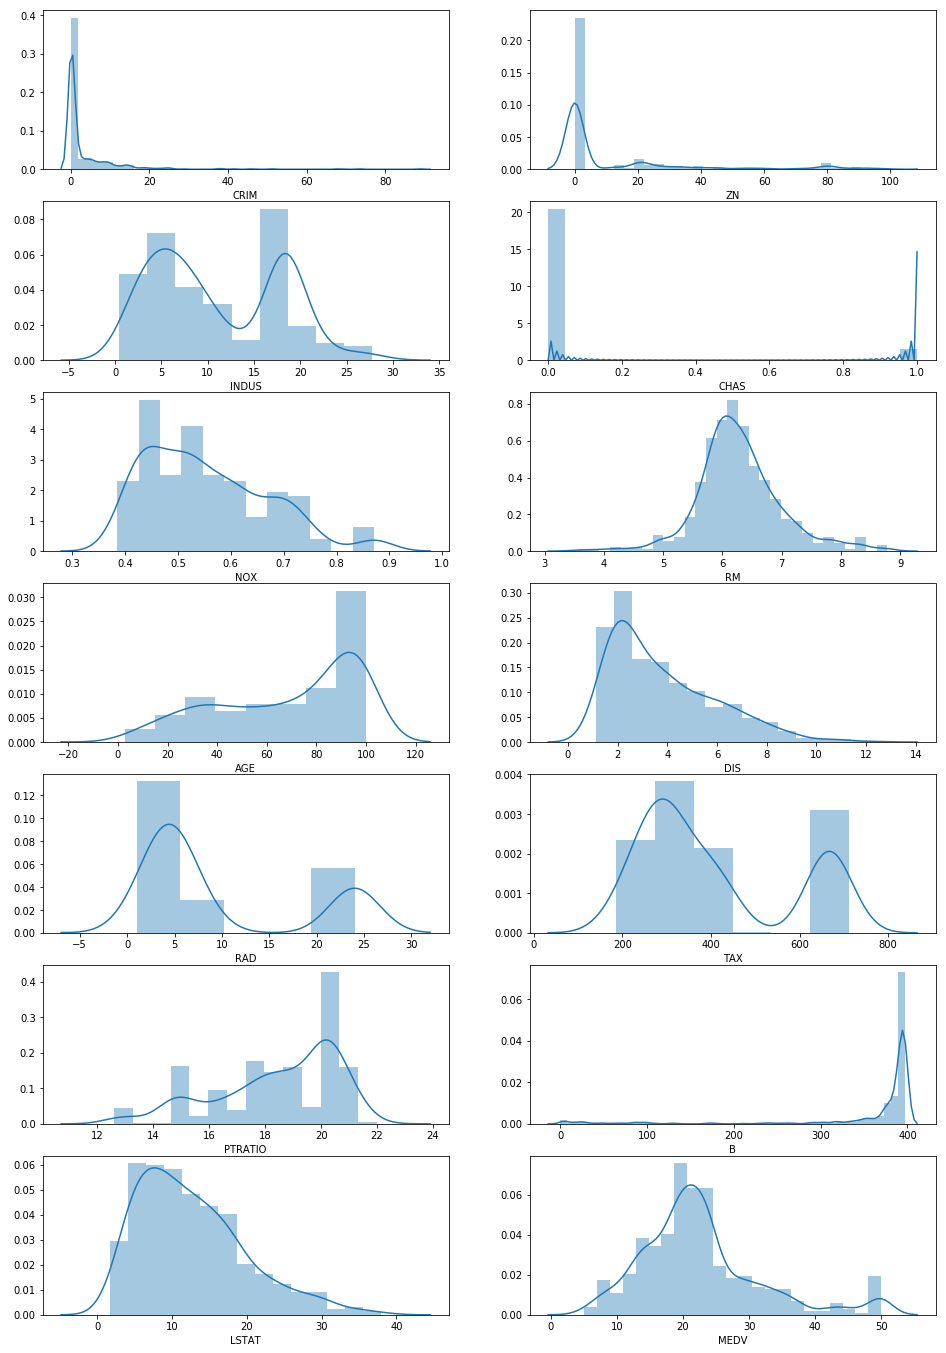

In [7]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df[i],ax=ax)

Except RM and MEDV, nothing else is normally distributed, this might be an issue, as most statistical assumptions hold true only when our data is normally distributed.

In [8]:
# lets look at some descriptive stats of our features
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Scale of our features are very different from each other, therefore we might have to rescale our data to improve our data quality, as we cannot apply PCA or Linear Regression on this data.

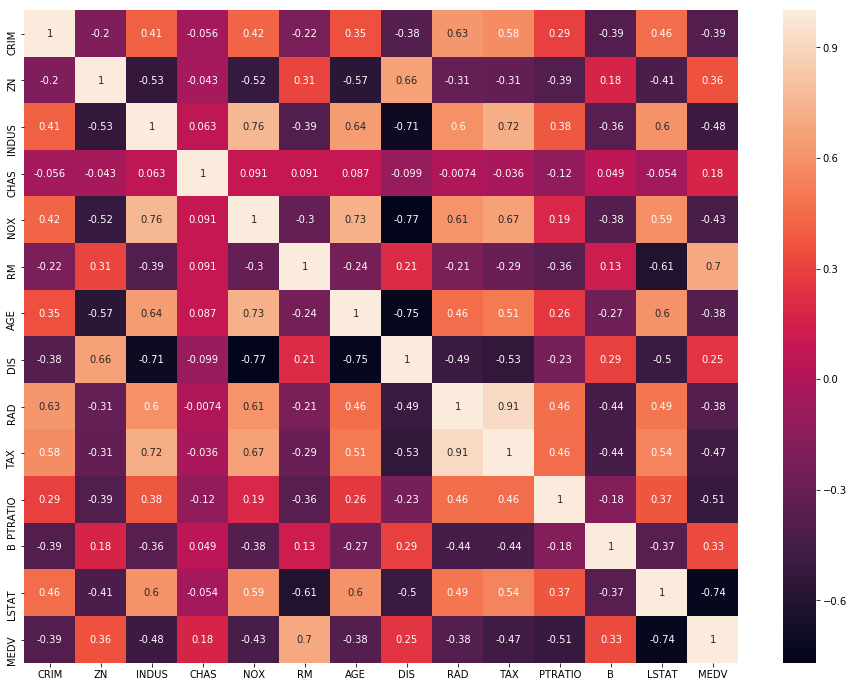

In [9]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True)

#### Note :
Our target variable, seems to be highly correlated, with LSTAT and RM, which makes sense, as these two are very important factors for house pricing, but there seems to be a lot of multicollinearity as well.

Issue here is, that there is a lot of collinearity between our predictor variables, for example DIS is highly correlated to INUDS, INOX and AGE.

In [10]:
# import libraries needed for this.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
# lets get the VIF value to understand the multi collinearity
vifdf = []
for i in df.columns:
    X = np.array(df.drop(i,axis=1))
    y = np.array(df[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.095223
11,B,1.381463
0,CRIM,1.831537
10,PTRATIO,1.993016
5,RM,2.260374
1,ZN,2.352186
6,AGE,3.100843
12,LSTAT,3.581585
13,MEDV,3.855684
2,INDUS,3.992503


# Standardiztion of Data

### Rescaling the data

As our data comprises of many kinds of features, all of which have different scale. This is okay for Analysis, but not for data  modelling. As different scales can cause our model to be unstable and vary more than we would want.

In [12]:
# Lets build our function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [13]:
# We will build a new dataframe
df_std = pd.DataFrame(columns=df.columns)
for i in df.columns:
    df_std[i] = rescale(df[i])

In [14]:
# Lets look at the descriptive stats now
df_std.describe().iloc[1:3:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16,-2.829533e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Note : Shape of Data does not changes when rescaling, it just scales the data to give mean at 0, and standard deviation as 1 for all the features.

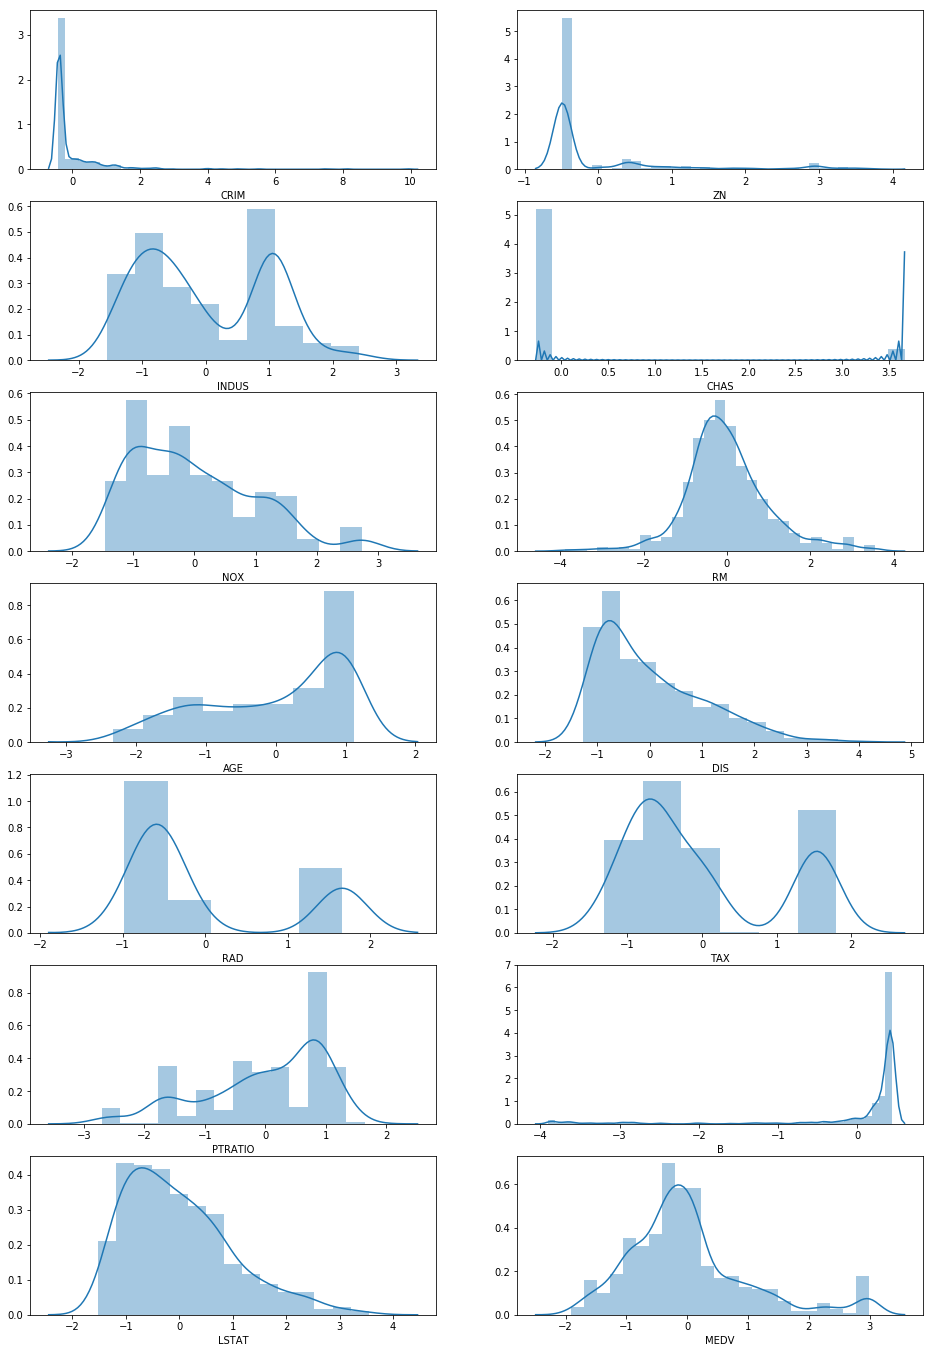

In [15]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std[i],ax=ax)

### As you can see, shape did not change, only the mean value shifted to 0

# Principal Component Analysis

In [16]:
# import libraries for PCA
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=13)
X = df_std.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
df_std_pca['MEDV'] = df_std['MEDV']

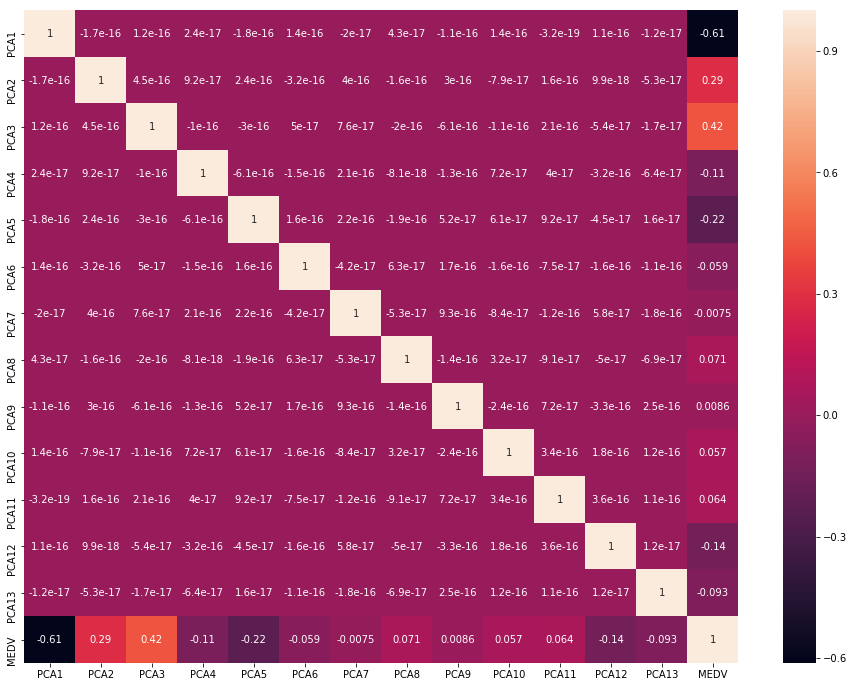

In [18]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_std_pca.corr(),annot=True)

### Note : As you can see there is no correlation between predictor variables, thus removing multicollinearity.

#### Note : The reason correlation between predictor variable and target varaiable is in sorted order is because, PCA takes all the explained variation and puts it into first components, and repeats the  process. The new feature are in no way related to the old ones, therfore it would be wrong to use the same name for them.

#### Note : PCA is often used to make the data Anonymous as it makes the data completely different from the original one, while still keeping the information in the data intact.

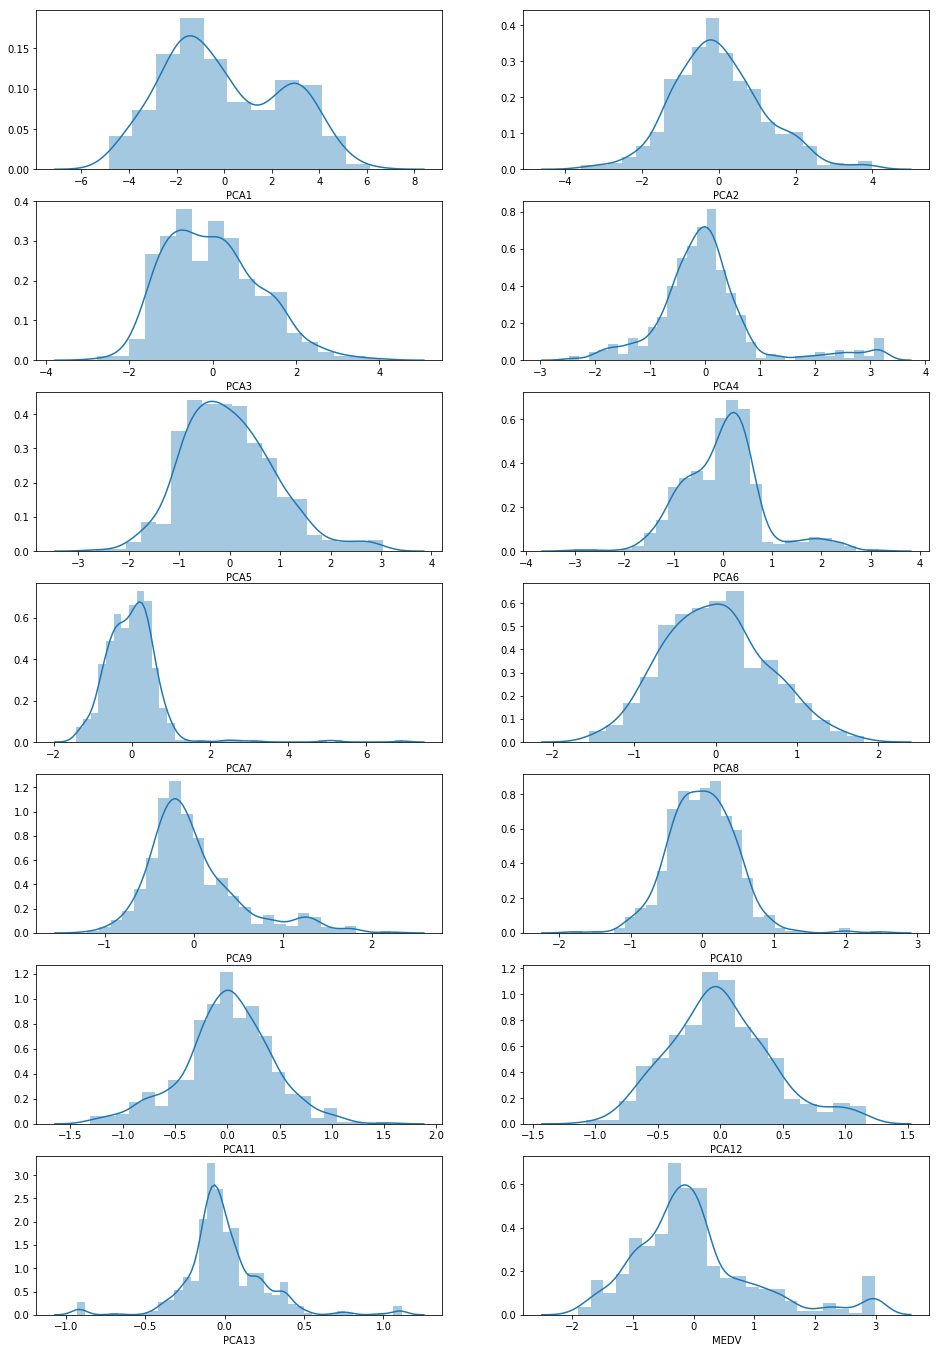

In [19]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

# Data Modelling

### Now that our data is ready, we can apply our modelling techniques to it.

## Simple Linear Regression

In [20]:
# import libraires needed to perform our Regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
# Split data into Training and testing
X = np.array(df_std_pca.drop('MEDV',axis=1))
y = np.array(df_std_pca['MEDV'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

Shape of Data is (404, 13)
Shape of Data is (102, 13)
Shape of Data is (404,)
Shape of Data is (102,)


In [22]:
# Lets train our model on training data and predict also on training to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.7389887611522272 | Root Mean Square Error is : 0.5205529565730772


In [23]:
# Lets train our model on training data and predict on testing to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R2 Score is : 0.739090532179653 | Root Mean Square Error is : 0.4655620872290595
